In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaries-in-data-science/ds_salaries.csv


In [2]:
# Load the dataset into a DataFrame
data_path = '/kaggle/input/salaries-in-data-science/ds_salaries.csv'
ds_salaries = pd.read_csv('/kaggle/input/salaries-in-data-science/ds_salaries.csv')

# Display the first few rows of the DataFrame and the information about the dataset
ds_salaries.head(), ds_salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


(   Unnamed: 0  work_year experience_level employment_type  \
 0           0       2020               MI              FT   
 1           1       2020               SE              FT   
 2           2       2020               SE              FT   
 3           3       2020               MI              FT   
 4           4       2020               SE              FT   
 
                     job_title  salary salary_currency  salary_in_usd  \
 0              Data Scientist   70000             EUR          79833   
 1  Machine Learning Scientist  260000             USD         260000   
 2           Big Data Engineer   85000             GBP         109024   
 3        Product Data Analyst   20000             USD          20000   
 4   Machine Learning Engineer  150000             USD         150000   
 
   employee_residence  remote_ratio company_location company_size  
 0                 DE             0               DE            L  
 1                 JP             0               

/tmp/ipykernel_19/3348094038.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='work_year', y='salary_in_usd', data=ds_salaries, estimator=np.mean, ci=None)


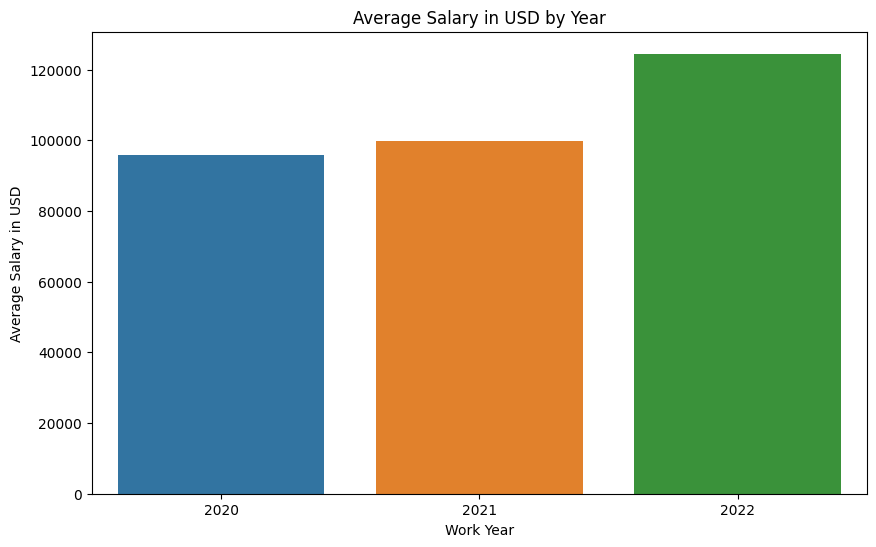

/tmp/ipykernel_19/3348094038.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='experience_level', y='salary_in_usd', data=ds_salaries, estimator=np.mean, ci=None, order=['EN', 'MI', 'SE', 'EX'])


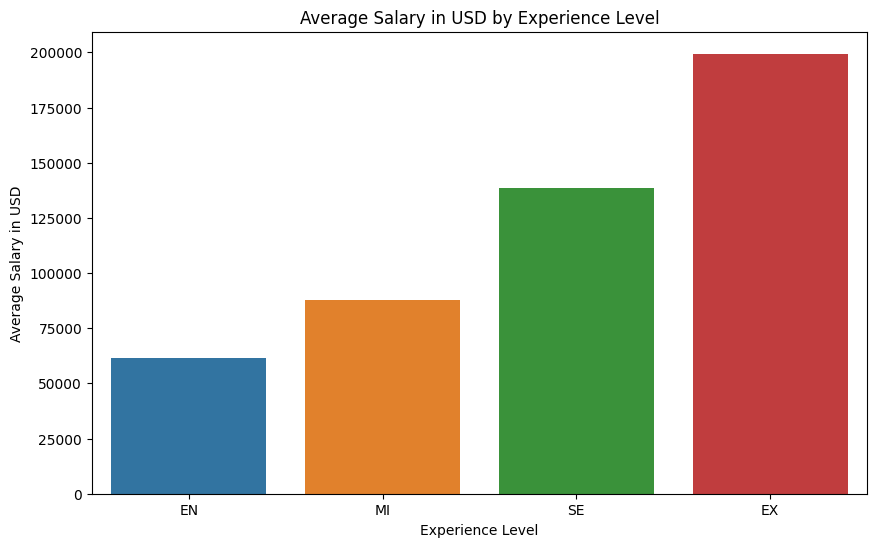

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correcting the estimator argument
# Plotting average salary over different work years
plt.figure(figsize=(10, 6))
sns.barplot(x='work_year', y='salary_in_usd', data=ds_salaries, estimator=np.mean, ci=None)
plt.title('Average Salary in USD by Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.show()

# Plotting average salary across experience levels
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=ds_salaries, estimator=np.mean, ci=None, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Average Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.show()


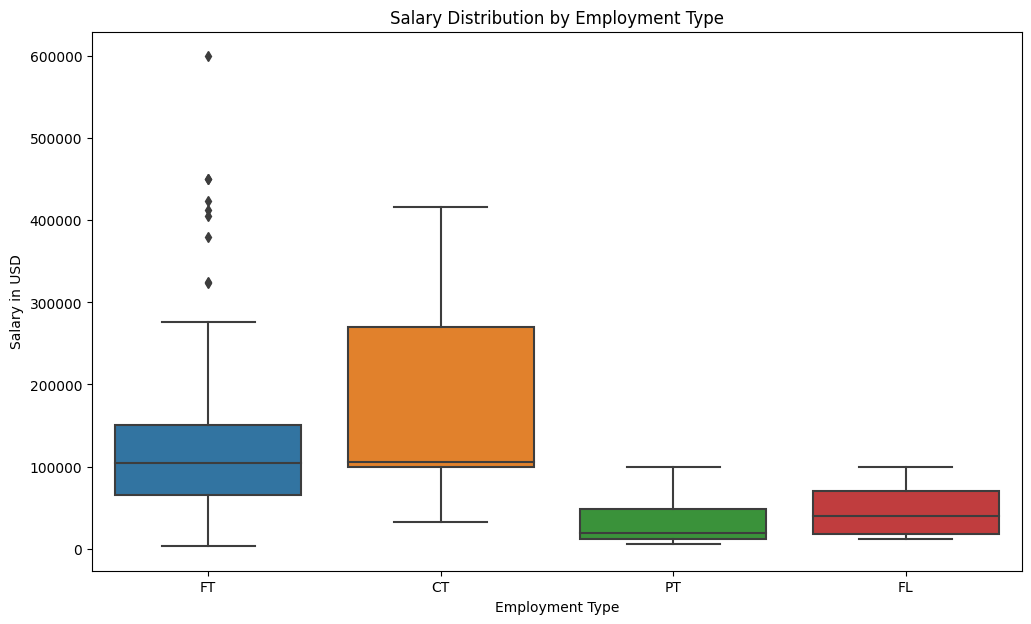

/tmp/ipykernel_19/2788128982.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='salary_in_usd', y='employee_residence', data=ds_salaries[ds_salaries['employee_residence'].isin(top_countries)], estimator=np.mean, ci=None)


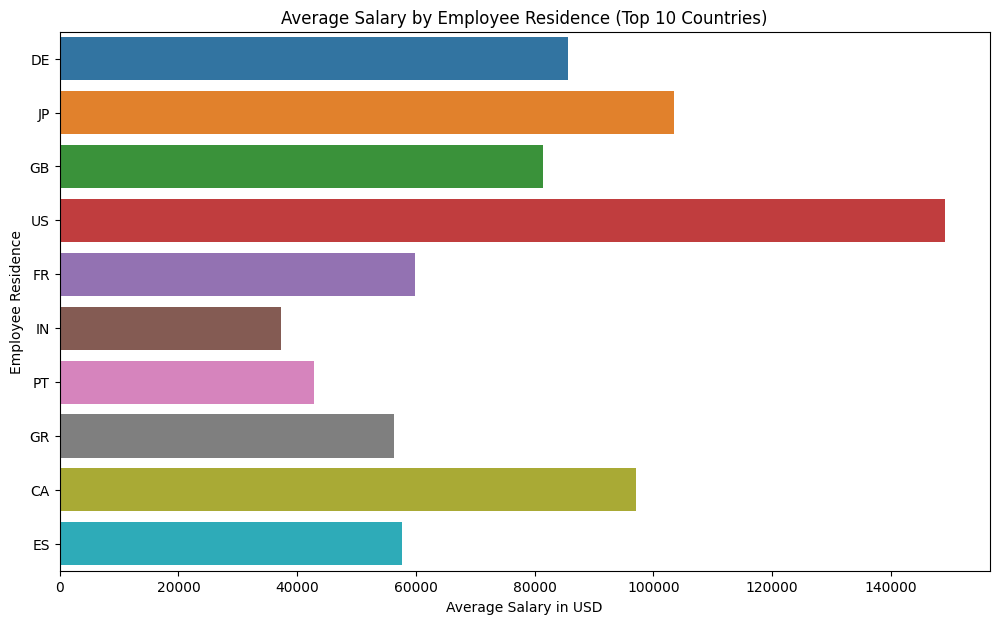

/tmp/ipykernel_19/2788128982.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='remote_ratio', y='salary_in_usd', data=ds_salaries, estimator=np.mean, ci=None)


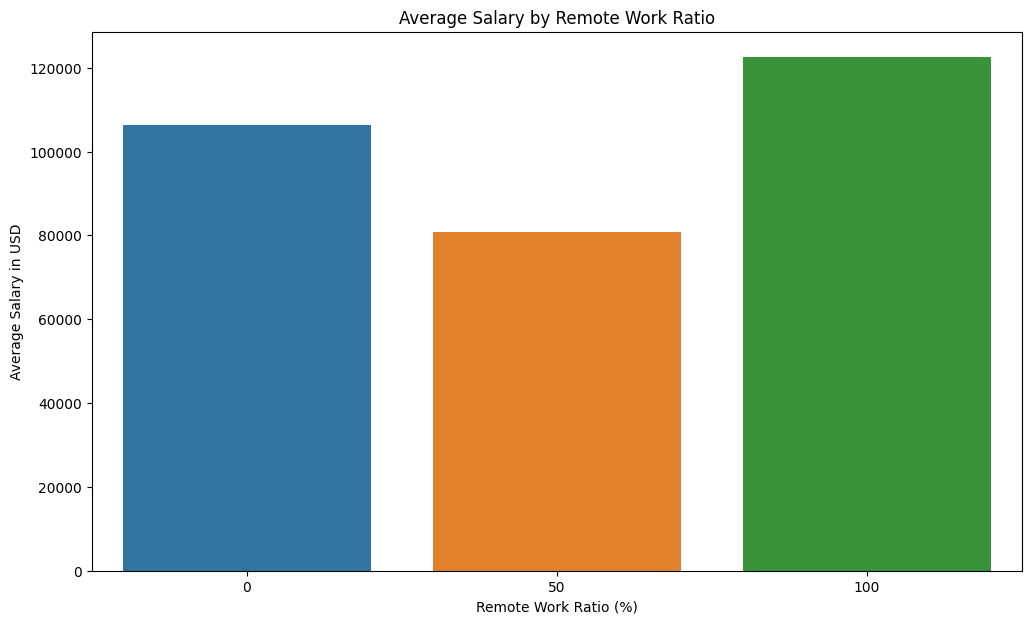

/tmp/ipykernel_19/2788128982.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='company_size', y='salary_in_usd', data=ds_salaries, order=['S', 'M', 'L'], estimator=np.mean, ci=None)


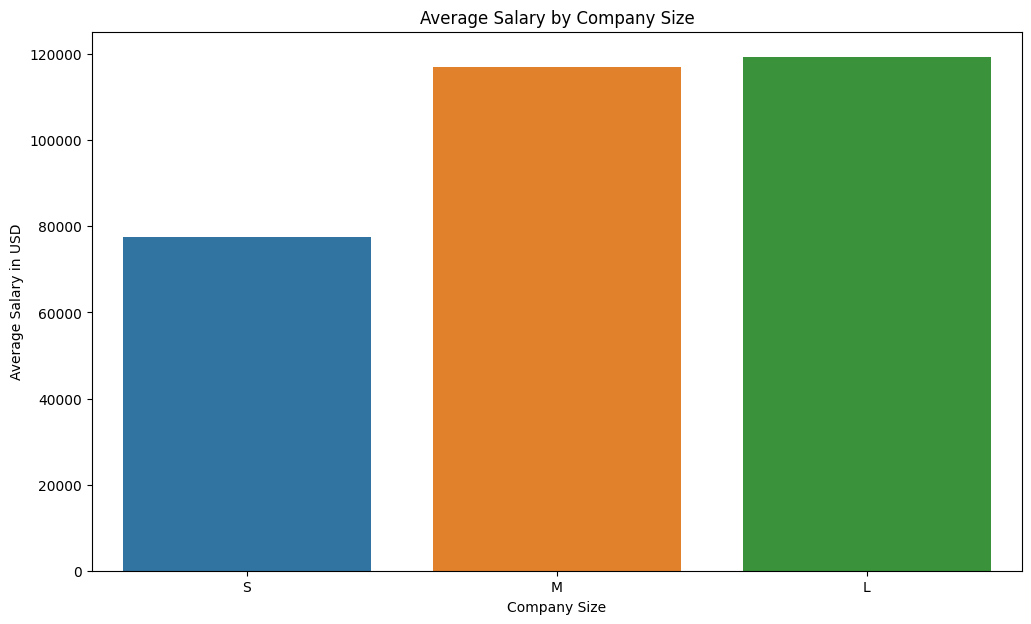

In [4]:
# Plotting average salary by employment type
plt.figure(figsize=(12, 7))
sns.boxplot(x='employment_type', y='salary_in_usd', data=ds_salaries)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

# Plotting average salary by employee residence
plt.figure(figsize=(12, 7))
top_countries = ds_salaries['employee_residence'].value_counts().nlargest(10).index
sns.barplot(x='salary_in_usd', y='employee_residence', data=ds_salaries[ds_salaries['employee_residence'].isin(top_countries)], estimator=np.mean, ci=None)
plt.title('Average Salary by Employee Residence (Top 10 Countries)')
plt.xlabel('Average Salary in USD')
plt.ylabel('Employee Residence')
plt.show()

# Analyzing the impact of remote work on salary
plt.figure(figsize=(12, 7))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=ds_salaries, estimator=np.mean, ci=None)
plt.title('Average Salary by Remote Work Ratio')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Average Salary in USD')
plt.show()

# Analyzing the impact of company size on salary
plt.figure(figsize=(12, 7))
sns.barplot(x='company_size', y='salary_in_usd', data=ds_salaries, order=['S', 'M', 'L'], estimator=np.mean, ci=None)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.show()


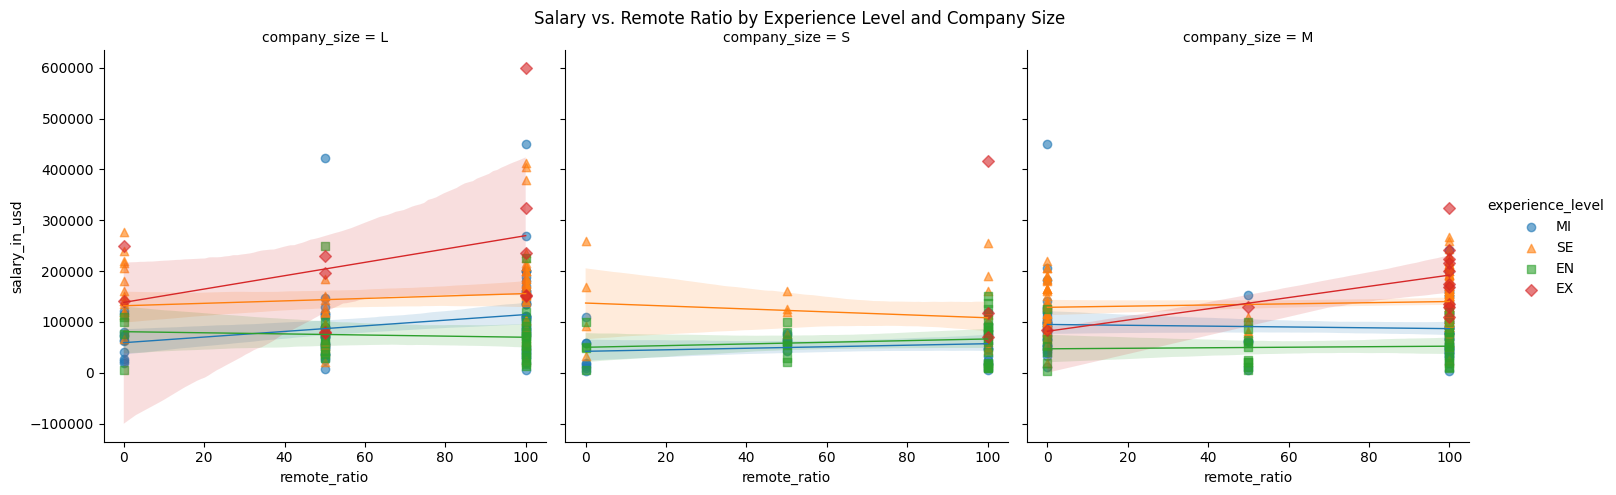

In [5]:
# Importing necessary libraries for multivariate analysis
from seaborn import lmplot

# Creating a scatter plot to visualize the relationship between experience level, company size, and salary, enhanced by remote work ratio
lmplot(data=ds_salaries, x='remote_ratio', y='salary_in_usd', hue='experience_level', col='company_size', 
       height=5, aspect=1, markers=['o', '^', 's', 'D'], scatter_kws={'alpha':0.6}, line_kws={'linewidth':1})
plt.subplots_adjust(top=0.9)
plt.suptitle('Salary vs. Remote Ratio by Experience Level and Company Size', verticalalignment='top')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparing the data for modeling
# Selecting features and target variable
X = ds_salaries[['experience_level', 'remote_ratio', 'company_size']]
y = ds_salaries['salary_in_usd']

# One-hot encoding categorical variables
categorical_features = ['experience_level', 'company_size']
one_hot = OneHotEncoder()

# Setting up the preprocessing steps and the modeling pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot, categorical_features)
], remainder='passthrough')

# Creating a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse, r2


(54140.45247167325, 0.2351896446513666)

**The multivariate scatter plots illustrate the relationship between salary, remote work ratio, and experience level across different company sizes**

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Creating a new pipeline with RandomForestRegressor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Parameters for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Setting up GridSearchCV to find the best parameters and model
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best estimator found by grid search
best_rf_model = grid_search.best_estimator_

# Predicting on test data
y_pred_rf = best_rf_model.predict(X_test)

# Evaluating the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf, grid_search.best_params_


Fitting 5 folds for each of 108 candidates, totalling 540 fits


(53500.56031239126,
 0.2531615681638285,
 {'regressor__max_depth': None,
  'regressor__min_samples_leaf': 4,
  'regressor__min_samples_split': 10,
  'regressor__n_estimators': 200})

In [8]:
# Simplified Random Forest Model without Grid Search
simple_rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

# Training the simple model
simple_rf_model.fit(X_train, y_train)

# Predicting on the test data
simple_y_pred = simple_rf_model.predict(X_test)

# Evaluating the simplified model
simple_rmse = mean_squared_error(y_test, simple_y_pred, squared=False)
simple_r2 = r2_score(y_test, simple_y_pred)

simple_rmse, simple_r2


(55283.68596961463, 0.2025490490650076)